# 01-TF-IDF

We will here compute the TF-IDF on a corpus of newspaper headlines.

Begin by importing needed libraries:

In [1]:
# import needed libraries
import nltk
import numpy as np
import pandas as pd

Import the data into the file *headlines.csv*

In [2]:
# TODO: Load the dataset
df = pd.read_csv("headlines.csv")

As usual, check the dataset basic information.

In [5]:
# TODO: Have a look at the data
print(df.head(5))
print(df.info())

   publish_date                                      headline_text
0      20170721  algorithms can make decisions on behalf of fed...
1      20170721  andrew forrests fmg to appeal pilbara native t...
2      20170721                           a rural mural in thallan
3      20170721  australia church risks becoming haven for abusers
4      20170721  australian company usgfx embroiled in shanghai...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   1999 non-null   int64 
 1   headline_text  1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None


We will now perform preprocessing on this text data: tokenization, punctuation and stop words removal and stemming.

Hint: to do so, use NLTK, *pandas*'s method *apply*, lambda functions and list comprehension

In [7]:
# TODO: Perform preprocessing
# import needed modules
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Tokenize
df["tokens"] = df.apply(lambda row: word_tokenize(row["headline_text"]), axis=1)

# Remove punctuation
df["alpha"] = df["tokens"].apply(lambda x: [item for item in x if item.isalpha()])

# Remove stop words
stop_words = stopwords.words("english")
df["stop"] = df["alpha"].apply(lambda x: [item for item in x if item not in stop_words])

# Stem
stemmer = PorterStemmer()
df["stemmed"] = df["stop"].apply(lambda x: [stemmer.stem(item) for item in x])
df["stemmed"]

0         [algorithm, make, decis, behalf, feder, minist]
1       [andrew, forrest, fmg, appeal, pilbara, nativ,...
2                                 [rural, mural, thallan]
3                  [australia, church, risk, becom, abus]
4       [australian, compani, usgfx, embroil, shanghai...
                              ...                        
1994    [constitut, avenu, win, top, prize, act, archi...
1995                         [dark, mofo, number, crunch]
1996    [david, petraeu, say, australia, must, firm, s...
1997    [driverless, car, australia, face, challeng, r...
1998               [drug, compani, criticis, price, hike]
Name: stemmed, Length: 1999, dtype: object

Compute now the Bag of Words for our data, using scikit-learn.

Warning: since we used our own preprocessing, you have to bypass analyzer with identity function.

In [13]:
# TODO: Compute the BOW of the preprocessed data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase = False, analyzer = lambda x: x)
bow = vectorizer.fit_transform(df["stemmed"]).toarray()
bow.shape

(1999, 4165)

You can check the shape of the BOW, the expected value is `(1999, 4165)`.

Now compute the Term Frequency and then the Inverse Document Frequency, and check the values are not only zeros.

In [17]:
# TODO: Compute the TF using the BOW
TF = pd.DataFrame(data=bow, columns=vectorizer.get_feature_names())
TF = TF.divide(TF.sum(axis=1), axis=0)
np.unique(TF)

array([0.        , 0.08333333, 0.09090909, 0.1       , 0.11111111,
       0.125     , 0.14285714, 0.16666667, 0.18181818, 0.2       ,
       0.22222222, 0.25      , 0.28571429, 0.33333333, 0.4       ,
       0.5       , 1.        ])

In [27]:
# TODO: Compute the IDF
IDF = pd.DataFrame(data=bow, columns=vectorizer.get_feature_names())
IDF[IDF>1] = 1
IDF = np.log(len(IDF)/IDF.sum(axis=0))
np.unique(IDF)

array([3.28291422, 3.36629583, 3.44151925, 3.53995932, 3.57505064,
       3.70858204, 3.79373984, 3.83920222, 3.91152288, 3.96281617,
       4.04505427, 4.10389477, 4.13466643, 4.16641513, 4.19920495,
       4.2331065 , 4.26819782, 4.30456547, 4.3423058 , 4.38152651,
       4.4223485 , 4.46490812, 4.50935988, 4.5558799 , 4.60467006,
       4.65596336, 4.71003058, 4.76718899, 4.82781361, 4.89235213,
       4.961345  , 5.03545298, 5.11549568, 5.20250706, 5.29781724,
       5.40317776, 5.52096079, 5.65449219, 5.80864287, 5.99096442,
       6.21410797, 6.50179005, 6.90725515, 7.60040233])

Compute finally the TF-IDF.

In [28]:
# TODO: compute the TF-IDF
TFIDF = TF * IDF

What are the 10 words with the highest and lowest TF-IDF on average?

In [33]:
# TODO: Print the 10 words with the highest and lowest TF-IDF on average
print("lowest words:\n", TFIDF.max(axis=0).sort_values()[:10], "\n")
print("hightst words:\n", TFIDF.max(axis=0).sort_values(ascending=False)[:10])

lowest words:
 gcfc    0.633367
geel    0.633367
gw      0.633367
haw     0.633367
melb    0.633367
coll    0.633367
adel    0.633367
syd     0.633367
nmfc    0.633367
cold    0.690456
dtype: float64 

hightst words:
 peacemak     7.600402
pump         6.907255
date         3.800201
puffbal      3.800201
superannu    3.800201
mongolian    3.800201
loophol      3.800201
rig          3.800201
aquapon      3.800201
mous         3.800201
dtype: float64


Now let's compute the TF-IDF using scikit-learn on our preprocessed data (the one you used to compute the BOW).

In [34]:
# TODO: Compute the TF-IDF using scikit learn
# Import the module
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TF-IDF vectorizer
vectorizer = TfidfVectorizer(lowercase=False, analyzer=lambda x: x)

# Compute the TF-IDF
tfidf = vectorizer.fit_transform(df["stemmed"]).toarray()
tfidf = pd.DataFrame(data=tfidf, columns=vectorizer.get_feature_names())

Compare the 10 highest and lowest TF-IDF words on average to the ones you had by yourself.

In [35]:
# TODO: Print the 10 words with the highest and lowest TF-IDF on average
print("lowest words:\n", tfidf.max(axis=0).sort_values()[:10], "\n")
print("hightst words:\n", tfidf.max(axis=0).sort_values(ascending=False)[:10])

lowest words:
 coll     0.305258
gw       0.305258
nmfc     0.305258
adel     0.305258
melb     0.305258
syd      0.305258
haw      0.305258
geel     0.305258
gcfc     0.305258
fabio    0.322574
dtype: float64 

hightst words:
 peacemak     1.000000
pump         1.000000
mongolian    0.831769
financ       0.803629
employ       0.795060
aquapon      0.794899
date         0.794899
travel       0.788050
rig          0.786813
mosul        0.779137
dtype: float64


Do you have the same words? How do you explain it?

There are some differences in words showing up as the highest and lowest scoring words. There is a also a difference in the score allocated to the words, they are normalised between 0 and 1 for the sklearn TfidfVectorizer.

The difference in the words could be due to the gamma value used by the sklearn TfidfVecotrizer, which is described for the rbf kernel (default kernel) in the screenshot from the documentation below:
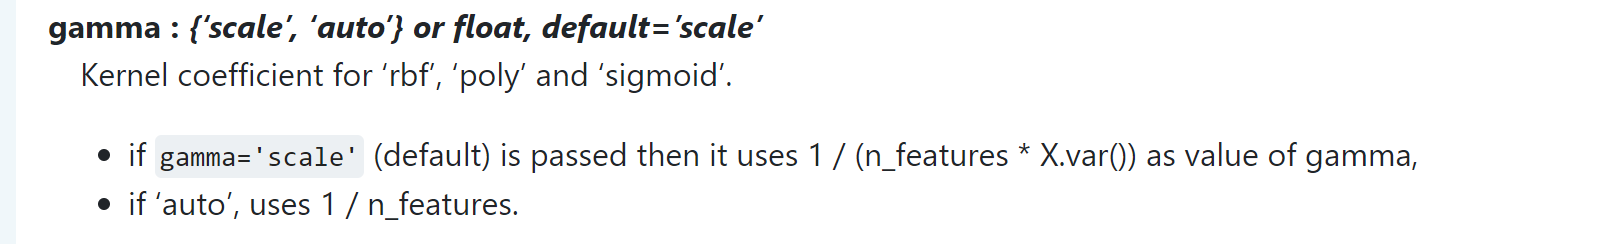